# Projeto - Análise Exploratória dos Dados

## Objetivos

A partir de um conjunto de dados (escolhido por vocÊs ou por sugestão do professor), o objetivo será desenvolver uma análise exploratória dos dados. Para isto segue alguns dos pontos cruciais para o desenvolvimento do projeto:

<br>

- __Definição do Conjunto de Dados:__ Determinar qual conjunto de dados deve ser analisado e se o conjunto de dados atende as espectativas para o projeto;

<br>

- __Análise de Consistência dos Dados__: Verificar se o conjunto de dados tem algum eventual problema (podendo ser dados faltantes, dados erroneos entre outros casos);

<br>

- __Análise Exploratória dos Dados__: Consiste em estudar o conjunto de dados! Então seria entender quais tipos de informações que pode-se obter, quais conclusões e/ou interpretações pode-se tirar dos dados (neste caso, gráfico para auxiliar nas análises são bem vindos(.

<br>

__Observações.:__ Este projeto pode ser feito individualmente ou em grupos de no máximo 3 pessoas;

__Data de Entrega:__ 23/02/2024

## 

O banco de dados escolhido foi sobre o preço dos combustíveis, a ideia inicial era trabalhar com dados antes e pós pandemia para comparação, mas os dados anteriores a 2020 estavam inutilizáveis ou não foram localizados.

In [1]:
#Primeiro passo, vamos realizar a importação das bibliotecas que usaremos a seguir.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Como meu projeto vem de bases temporais, terei que concatenar cerca de 08 bases.

df = pd.read_csv('ca-2020-01.csv', sep=";")
df2 = pd.read_csv('ca-2020-02.csv', sep=";")
df3 = pd.read_csv('ca-2021-01.csv', sep=";")
df4 = pd.read_csv('ca-2021-02.csv',  encoding='latin-1', sep=";")
df5 = pd.read_csv('ca-2022-01.csv', sep=";")
df6 = pd.read_csv('ca-2022-02.csv', sep=";")
df7 = pd.read_csv('ca-2023-01.csv', sep=";")
df8 = pd.read_csv('ca-2023-02.csv', sep=";")
final_data = pd.concat([df,df2,df3,df4,df5,df6,df7,df8], ignore_index=True)


C:\Users\Thiago\AppData\Local\Temp\ipykernel_20152\685189157.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('ca-2020-02.csv', sep=";")


In [3]:
#Vamos ver as colunas, a estruturação dos dados, ver algumas formatações
final_data.head(3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,03/01/2020,"4,399",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,03/01/2020,"3,199",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,03/01/2020,"3,899",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [4]:
#Aqui a intenção é saber o tipo que a coluna está tipada
final_data.dtypes

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Revenda              object
CNPJ da Revenda      object
Nome da Rua          object
Numero Rua           object
Complemento          object
Bairro               object
Cep                  object
Produto              object
Data da Coleta       object
Valor de Venda       object
Valor de Compra      object
Unidade de Medida    object
Bandeira             object
dtype: object

In [5]:
#Vamos ver os típos de Produtos que temos na nossa base unitariamente
print(final_data['Produto'].unique())

['GASOLINA' 'ETANOL' 'DIESEL S10' 'GNV' 'DIESEL' 'GASOLINA ADITIVADA']


In [6]:
#Quando comecei a tentar fazer alguma operação me deparei com algum erro, e foi porque minha coluna está com , e o python não estava aceitando
final_data['Valor de Venda'] = final_data['Valor de Venda'].str.replace(',','.').astype(float)


In [7]:
#Aqui vamos verificar de modo simples e direto, o valor máximo que tivemos no brasil inteiro, assim como o mínimo e também a variância entre esses dois valores.
max_produtos = final_data.groupby('Produto')['Valor de Venda'].max().sort_values()
min_produtos = final_data.groupby('Produto')['Valor de Venda'].min().sort_values()
variação_preco_produtos = max_produtos - min_produtos.sort_values()

print(min_produtos, max_produtos, variação_preco_produtos)


Produto
ETANOL                1.799
GNV                   2.000
DIESEL                2.453
DIESEL S10            2.465
GASOLINA              2.870
GASOLINA ADITIVADA    3.457
Name: Valor de Venda, dtype: float64 Produto
ETANOL                7.980
GNV                   7.990
GASOLINA              8.990
DIESEL                8.999
DIESEL S10            9.650
GASOLINA ADITIVADA    9.790
Name: Valor de Venda, dtype: float64 Produto
DIESEL                6.546
DIESEL S10            7.185
ETANOL                6.181
GASOLINA              6.120
GASOLINA ADITIVADA    6.333
GNV                   5.990
Name: Valor de Venda, dtype: float64


In [8]:
#Quero fazer um teste com um gráfico, para isso já vi que terei que alterar o tipo da coluna de data, então vamos fazer a converção.

final_data['Data da Coleta'] = pd.to_datetime(final_data['Data da Coleta'], format= '%d/%m/%Y')

<function matplotlib.pyplot.show(close=None, block=None)>

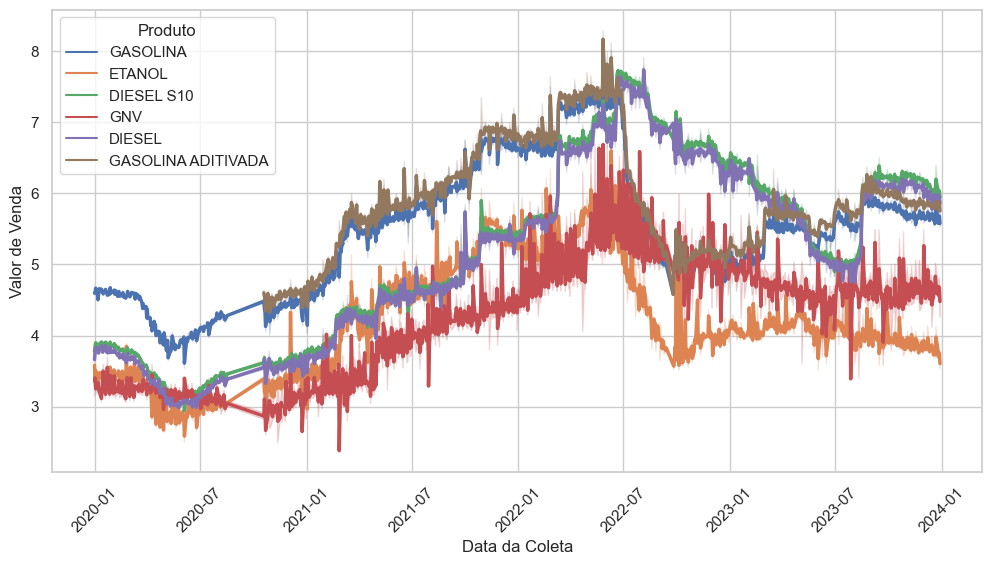

In [10]:
#Vamos trazer um gráfico de tempo x  valor por produto usnado o seaborn

sns.set(style = 'whitegrid')
plt.figure(figsize=(12,6)) #definindo o nome

#vamos chamar um gráfico de área
sns.lineplot(data=final_data, x ='Data da Coleta', y = 'Valor de Venda', hue= 'Produto', linewidth = 2.5)
plt.xticks(rotation = 45)
plt.show    

In [11]:
print(final_data['Produto'].unique())

['GASOLINA' 'ETANOL' 'DIESEL S10' 'GNV' 'DIESEL' 'GASOLINA ADITIVADA']


In [12]:
#Bom, como temos uma base separa por estados, pensei em trazer agora a média por tipo e estado, dessa forma conseguimos visualizar qual Estado tem a maior e a menor média e se essa média acompanha pra todos os produtos.
media_produtos = final_data.groupby(['Produto','Estado - Sigla'])['Valor de Venda'].mean().sort_values()
#print(media_produtos)

#gasolina = media_produtos.loc['GASOLINA']
#plt.figure(figsize=(5,3))
#plt.bar(gasolina.index, gasolina.values, color='blue')
#plt.ylabel('Média de Vendas de Gasolina')
#plt.xticks(rotation=65, ha='right')
#plt.show
#A Visualização não ficou clara, vamos tentar trazer separado por produto e estado mas em tabela, para verificarmos melhor

media_produtos_df = media_produtos.unstack(level='Produto')
print(media_produtos_df)

Produto           DIESEL  DIESEL S10    ETANOL  GASOLINA  GASOLINA ADITIVADA  \
Estado - Sigla                                                                 
AC              5.926237    5.974624  5.057534  6.129942            6.484919   
AL              5.349062    5.392285  4.524609  5.659127            6.088909   
AM              5.215082    5.490529  4.330577  5.750414            6.029626   
AP              5.243236    5.606288  5.023119  4.844193            5.556436   
BA              5.160818    5.283530  4.472848  5.725310            6.288541   
CE              5.164864    5.321618  4.745173  5.673921            6.297838   
DF              5.224932    5.253645  4.287638  5.494541            5.850592   
ES              4.927776    5.117018  4.616676  5.564414            6.076207   
GO              5.198658    5.313446  3.924856  5.608224            6.125859   
MA              5.194729    5.283578  4.652236  5.390792            5.888791   
MG              5.148304    5.303668  4.

In [13]:
#Agora  quero trazer o estado que tem a maior média de cada produto e a menor para tirarmos alguns insigths

def maior_media_por_produto(dataframe):
    estado_media = {}
    for produto in dataframe.columns:
        estado = dataframe[produto].idxmax()
        media = round(dataframe.loc[estado, produto],2)
        estado_media[produto] = {'estado': estado, 'media': media}
    return estado_media

maior_media = maior_media_por_produto(media_produtos_df)
for produto, info in maior_media.items():
    print(f"O estado com a maior média de {produto} é {info['estado']} com média de {info['media']}.")

O estado com a maior média de DIESEL é AC com média de 5.93.
O estado com a maior média de DIESEL S10 é AC com média de 5.97.
O estado com a maior média de ETANOL é RS com média de 5.12.
O estado com a maior média de GASOLINA é AC com média de 6.13.
O estado com a maior média de GASOLINA ADITIVADA é AC com média de 6.48.
O estado com a maior média de GNV é DF com média de 6.54.


In [17]:

def menor_media_por_produto(dataframe):
    estado_media = {}
    for produto in dataframe.columns:
        estado = dataframe[produto].idxmin()
        media = round(dataframe.loc[estado, produto],2)
        estado_media[produto] = {'estado': estado, 'media': media}
    return estado_media

menor_media = menor_media_por_produto(media_produtos_df)
for produto, info in menor_media.items():
    print(f"O estado com a menor média de {produto} é {info['estado']} com média de {info['media']}.")

O estado com a menor média de DIESEL é ES com média de 4.93.
O estado com a menor média de DIESEL S10 é PR com média de 5.07.
O estado com a menor média de ETANOL é SP com média de 3.76.
O estado com a menor média de GASOLINA é AP com média de 4.84.
O estado com a menor média de GASOLINA ADITIVADA é AP com média de 5.56.
O estado com a menor média de GNV é GO com média de 2.43.


## Resumo

- Busquei trabalhar com uma base de dados um pouco mais maleável e com poucos erros de tratamento, já que o foco era a análise exploratória.
tentei mesclar visualizações de tabelas com visualizações gráficas, pelo tanto de informação disponível, trabalhar com gráficos dependendo do 
angulo que queremos vizualizar não fica bom, vide o gráfico disponibilizado. 

- Trouxe uma tabela e após isso decidi tirar a média dos valores e com isso verificar em quais estados estavam os extremos, como mínimo e máximo de média.

- É interessante que as médias me surpreenderam, pois temos como os 4 maiores produtores de petróleo do brasil sendo, Bacias de campos, santos, espirito santo e recôncavo baiano, e eu esperava que ao menos 
essas localizações tivessem as menores médias afinal não deve se gastar com tranposte ao mesmo que gastam os estados que não produzem.

- Minha maior surpresa foi o Amapa estar relacionado duas vezes na relação da média mais baixa dos tipos de gasolina, e isso se deve ao fato de questões tributarias que contribuem para tal, assim como o menor ICMS do brasil 
    Fonte:https://www.uol.com.br/carros/noticias/redacao/2022/05/18/por-que-macapa-e-a-capital-com-a-gasolina-mais-barata-do-brasil.htm

- Agora falando das médias mais altas, temos o AC com incríveis médias mais altas em 4 dos 6 produtos, e a partir de pesquisas a resposta é que o custo com logística onera demais o valor que é erpassado ao consumidor final
    Fonte:https://noticiapreta.com.br/acre-tem-gasolina-comum-mais-cara-do-pais/

- Vimos também a partir do gráfico de todos os produtos que a um certo comportamento padronizado no aumento e decréscimo dos preços o que responde isso são os repasses das refinarias.
podemos observar também que o valor que tivemos em 2020 ano de inicio do nosso dataset, nunca mais foi alcançado e dentre o passar dos anos o gráfico vai se movimentando de acordo com as novas regras e políticas do mercado.

- Por fim, temos no final do gráfico o Diesel S10 acompanhado pelo Diesel comum como sendo os mais caros, enquanto o Etanol segue sendo o mais barato. E não é preciso muito para saber que o valor do DIESEL afeta diretamente 
o valor dos fretes, que é repassado as empresas e em sequência ao produto final.
